## `MOVIE RATING REDICTION WITH PYTHON` 

# 1)  Introduction

### 1.1)Project Overview

* Movie Rating Prediction project enables you to explore data
analysis, preprocessing, feature engineering, and machine
learning modeling techniques. It provides insights into the factors
that influence movie ratings and allows you to build a model that
can estimate the ratings of movies accurately.

### 1.2) Problem Statement

* Build a model that predicts the rating of a movie based on
features like genre, director, and actors. You can use regression
techniques to tackle this problem.
The goal is to analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.

### Load the required libraries 

In [183]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

###  Data Munging 

In [184]:
movie_data = pd.read_csv(r"C:\Users\wanji\Desktop\Data\archive (9)\IMDb Movies India.csv", encoding='ISO-8859-1')
movie_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


####  Understanding the dataset: 
* `Dataset Info`
* `Shape`
* `Columns,Columns names and data types`

In [185]:
# Function to know the info of the datasets
def create_dataset_info(dataset):
    if isinstance(dataset, pd.DataFrame):
        info = dataset.info()
        return info
    else:
        return "Invalid dataset type. Please provide a Pandas DataFrame."
# Assuming you have a dataset named 'sales_data'
dataset_info = create_dataset_info(movie_data)
print(dataset_info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None


In [186]:
# Function to know the shape 
def check_dataset_shape(dataset):
    if isinstance(dataset, np.ndarray):
        print("Dataset shape:", dataset.shape)
    elif isinstance(dataset, pd.DataFrame):
        print("Dataset shape:", dataset.shape)
    else:
        print("Invalid dataset type. Please provide a NumPy array or a Pandas DataFrame.")
        
check_dataset_shape(movie_data)

Dataset shape: (15509, 10)


The dataset contains 15509 rows and 10 columns

In [187]:
# Function to know statistics
def get_dataset_statistics_describe(dataset):

    dataset_describe = dataset.describe()
    print(dataset_describe)


# Call the function to get information about the dataset
get_dataset_statistics_describe(movie_data)

            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000


In [188]:
# Examine the columns in the dataset
movie_data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

## 2) Data Cleaning

In [189]:
# Check for duplicates
def dataset_duplicated(dataset):
  
    dataset_duplicated = dataset.duplicated().sum()
    print(dataset_duplicated)


dataset_duplicated(movie_data)

6


In [190]:
# Drop the duplicates
def drop_duplicates(dataset):
    dataset.drop_duplicates(inplace = True)
    
drop_duplicates(movie_data) 

In [191]:
# Confirm/check for duplictes
movie_data.duplicated().sum()

0

* There are no duplicates after dropping them 

In [192]:
# Check the percentage of the missing values
def print_missing_values(movie_data):

    # Get columns with missing values
    columns_with_missing = movie_data.columns[movie_data.isnull().any()].tolist()

    # Calculate sum and percentage of missing values for each column
    missing_values_sum = movie_data[columns_with_missing].isnull().sum()
    missing_values_percentage = (missing_values_sum / len(movie_data)) * 100

    # Create a table with the missing values information
    missing_values_table = pd.DataFrame({
        'Column': columns_with_missing,
        'Missing Values': missing_values_sum,
        'Percentage': missing_values_percentage
    })

    # Print the table with column names and their respective missing values
    print(f"{'Column':<20} {'Missing Values':<15} {'Percentage':<15}")
    for _, row in missing_values_table.iterrows():
        print(f"{row['Column']:<20} {row['Missing Values']:<15} {row['Percentage']:<15.2f}")

print_missing_values(movie_data)

Column               Missing Values  Percentage     
Year                 527             3.40           
Duration             8264            53.31          
Genre                1876            12.10          
Rating               7584            48.92          
Votes                7583            48.91          
Director             524             3.38           
Actor 1              1615            10.42          
Actor 2              2381            15.36          
Actor 3              3140            20.25          


* The dataset shows there are some missing values(%) in the dataset 

In [193]:
unique_years = movie_data['Year'].unique()
print(unique_years)


[nan '(2019)' '(2021)' '(2010)' '(1997)' '(2005)' '(2008)' '(2012)'
 '(2014)' '(2004)' '(2016)' '(1991)' '(1990)' '(2018)' '(1987)' '(1948)'
 '(1958)' '(2017)' '(2020)' '(2009)' '(2002)' '(1993)' '(1946)' '(1994)'
 '(2007)' '(2013)' '(2003)' '(1998)' '(1979)' '(1951)' '(1956)' '(1974)'
 '(2015)' '(2006)' '(1981)' '(1985)' '(2011)' '(2001)' '(1967)' '(1988)'
 '(1995)' '(1959)' '(1996)' '(1970)' '(1976)' '(2000)' '(1999)' '(1973)'
 '(1968)' '(1943)' '(1953)' '(1986)' '(1983)' '(1989)' '(1982)' '(1977)'
 '(1957)' '(1950)' '(1992)' '(1969)' '(1975)' '(1947)' '(1972)' '(1971)'
 '(1935)' '(1978)' '(1960)' '(1944)' '(1963)' '(1940)' '(1984)' '(1934)'
 '(1955)' '(1936)' '(1980)' '(1966)' '(1949)' '(1962)' '(1964)' '(1952)'
 '(1933)' '(1942)' '(1939)' '(1954)' '(1945)' '(1961)' '(1965)' '(1938)'
 '(1941)' '(1931)' '(1937)' '(2022)' '(1932)' '(1923)' '(1915)' '(1928)'
 '(1922)' '(1917)' '(1913)' '(1930)' '(1926)' '(1914)' '(1924)']


In [194]:
movie_data = movie_data.dropna(subset=['Year'])

In [195]:
# Convert the 'Year' column to numeric with 'coerce' error handling
movie_data['Votes_numeric'] = pd.to_numeric(movie_data['Votes'], errors='coerce')
#Duration column
duration_pattern = r'(\d+) min'
movie_data['Duration_numeric'] = movie_data['Duration'].str.extract(duration_pattern,expand= False)
movie_data['Duration_numeric'] = pd.to_numeric(movie_data['Duration_numeric'], errors='coerce')

<ipython-input-195-90f406a4545c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data['Votes_numeric'] = pd.to_numeric(movie_data['Votes'], errors='coerce')
<ipython-input-195-90f406a4545c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data['Duration_numeric'] = movie_data['Duration'].str.extract(duration_pattern,expand= False)
<ipython-input-195-90f406a4545c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [196]:
# Votes
mean_votes = movie_data['Votes_numeric'].mean()
movie_data['Votes_numeric'].fillna(mean_votes,inplace = True)

# Duration
mean_duration = movie_data['Duration_numeric'].mean()
movie_data['Duration_numeric'].fillna(mean_duration,inplace = True)

c:\Users\wanji\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [197]:
movie_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Votes_numeric,Duration_numeric
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,8.000000,109.000000
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,120.839493,90.000000
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,35.000000,110.000000
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,120.839493,105.000000
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,827.000000,147.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,11.000000,128.469075
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,655.000000,129.000000
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN,120.839493,128.469075
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN,120.839493,128.469075


In [198]:
movie_data['Rating'].fillna(movie_data['Rating'].mean(),inplace = True)
movie_data['Genre'].fillna(movie_data['Genre'].mode(),inplace = True)
movie_data['Director'].fillna(movie_data['Director'].mode(),inplace = True)
movie_data['Actor 1'].fillna(movie_data['Actor 1'].mode(),inplace = True)
movie_data['Actor 2'].fillna(movie_data['Actor 2'].mode(),inplace = True)
movie_data['Actor 3'].fillna(movie_data['Actor 3'].mode(),inplace = True)

c:\Users\wanji\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [199]:
movie_data['Year'] = movie_data['Year'].str.extract('(\d+)').astype(int)

<ipython-input-199-cf8810f2f9e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data['Year'] = movie_data['Year'].str.extract('(\d+)').astype(int)


In [200]:
# Extract features (e.g., 'Years Since Release' from 'Year' column)
current_year = 2021
movie_data['Years_Since_Release'] = current_year - movie_data['Year']


<ipython-input-200-399aca1aa40f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data['Years_Since_Release'] = current_year - movie_data['Year']


---

In [201]:
movie_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Votes_numeric,Duration_numeric,Years_Since_Release
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.000000,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,8.000000,109.000000,2
2,#Homecoming,2021,90 min,"Drama, Musical",5.841621,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,120.839493,90.000000,0
3,#Yaaram,2019,110 min,"Comedy, Romance",4.400000,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,35.000000,110.000000,2
4,...And Once Again,2010,105 min,Drama,5.841621,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,120.839493,105.000000,11
5,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.700000,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,827.000000,147.000000,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988,NaN,Action,4.600000,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,11.000000,128.469075,33
15505,Zulmi,1999,129 min,"Action, Drama",4.500000,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,655.000000,129.000000,22
15506,Zulmi Raj,2005,NaN,Action,5.841621,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN,120.839493,128.469075,16
15507,Zulmi Shikari,1988,NaN,Action,5.841621,NaN,NaN,NaN,NaN,NaN,120.839493,128.469075,33


# 3) EDA

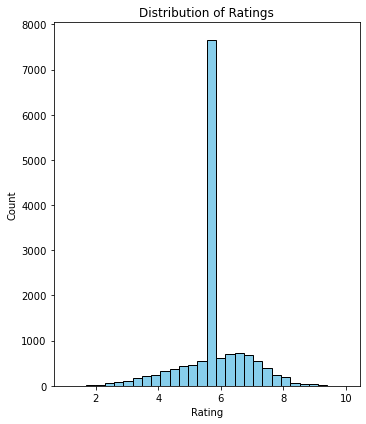

In [209]:
plt.figure(figsize=(14,6))
plt.subplot(131)
plt.hist(movie_data['Rating'], bins=30, color = 'skyblue',edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.tight_layout()
plt.show()

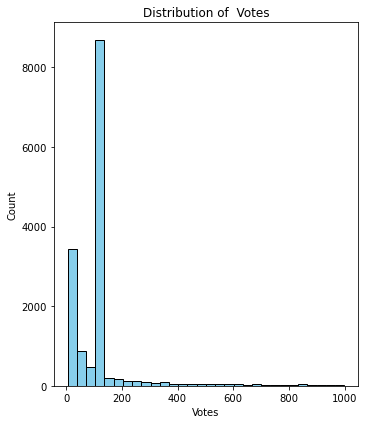

In [210]:
plt.figure(figsize=(14,6))
plt.subplot(131)
plt.hist(movie_data['Votes_numeric'], bins=30, color = 'skyblue',edgecolor='black')
plt.xlabel('Votes')
plt.ylabel('Count')
plt.title('Distribution of  Votes')
plt.tight_layout()
plt.show()

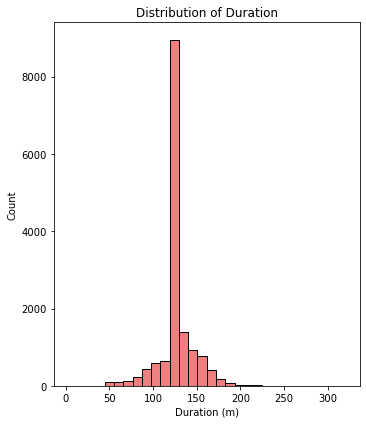

In [211]:
plt.figure(figsize=(14,6))
plt.subplot(131)
plt.hist(movie_data['Duration_numeric'], bins=30, color = 'lightcoral',edgecolor='black')
plt.xlabel('Duration (m)')
plt.ylabel('Count')
plt.title('Distribution of Duration')
plt.tight_layout()
plt.show()

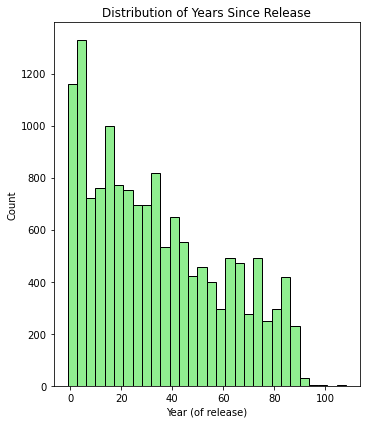

In [212]:
plt.figure(figsize=(14,6))
plt.subplot(131)
plt.hist(movie_data['Years_Since_Release'], bins=30, color = 'lightgreen',edgecolor='black')
plt.xlabel('Year (of release)')
plt.ylabel('Count')
plt.title('Distribution of Years Since Release')
plt.tight_layout()
plt.show()

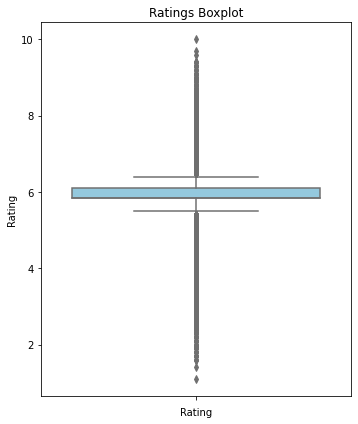

In [213]:
plt.figure(figsize=(14,6))
plt.subplot(131)
sns.boxplot(y = movie_data['Rating'], color = 'skyblue')
plt.xlabel('Rating')
plt.title('Ratings Boxplot')
plt.tight_layout()
plt.show()

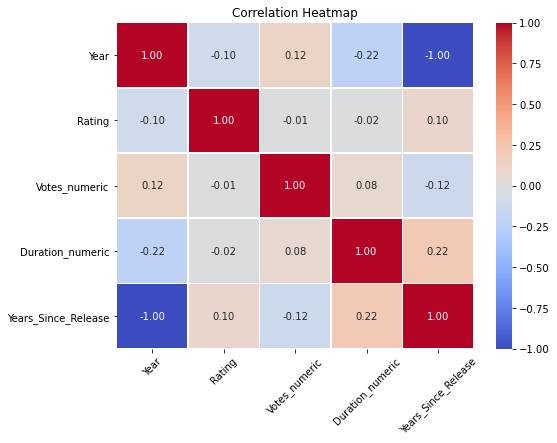

In [214]:
# Correlation matrix using a heatmap
correlation_matrix = movie_data.corr()
plt.figure(figsize=(8, 6))  # Increase the figure size
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)  # Add annotations and adjust line widths
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

## Feature values   Engineering
#### One hot Encoding "Genre"